In [12]:
from pygam import LinearGAM, s, f, l
import pandas as pd

In [13]:
data_train = pd.read_csv("https://github.com/dustywhite7/econ8310-assignment1/raw/main/assignment_data_train.csv")
data_test = pd.read_csv("https://github.com/dustywhite7/econ8310-assignment1/raw/main/assignment_data_test.csv")

In [14]:
x_train = data_train[['month','day','hour']]
y_train = data_train['trips']

In [15]:
model = LinearGAM(s(0) + s(1) + s(2))
modelFit = model.gridsearch(x_train.values, y_train)

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:010:00


In [16]:
X_data_test = data_test[['month','day','hour']]
y_pred = modelFit.predict(X_data_test)


100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:010:00


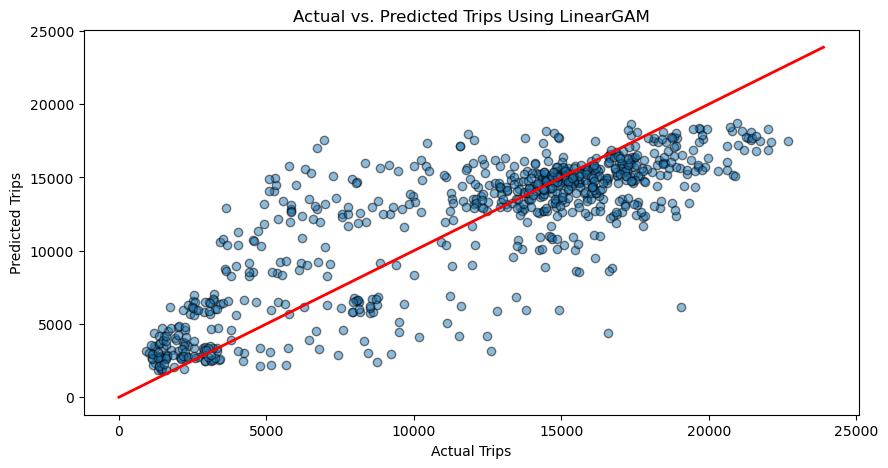

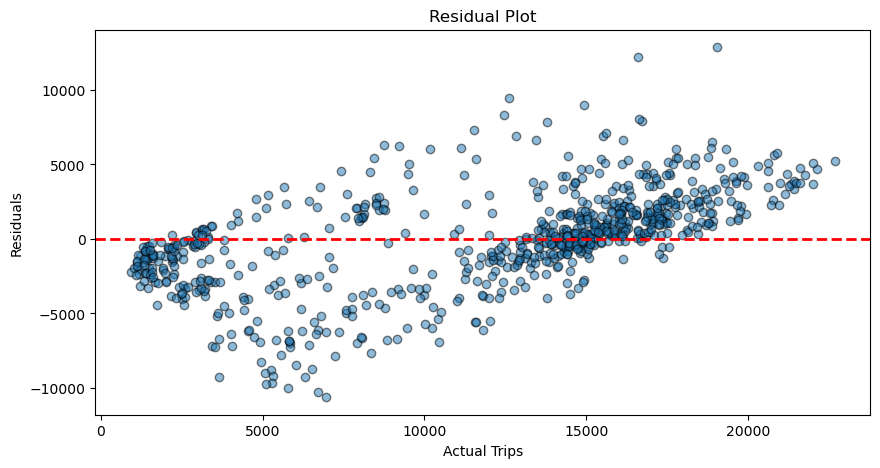

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from pygam import LinearGAM, s
import pickle

# Load datasets
data_train = pd.read_csv("https://github.com/dustywhite7/econ8310-assignment1/raw/main/assignment_data_train.csv")
data_test = pd.read_csv("https://github.com/dustywhite7/econ8310-assignment1/raw/main/assignment_data_test.csv")

# Prepare training and test data
x_train = data_train[['month', 'day', 'hour']]
y_train = data_train['trips']
X_data_test = data_test[['month', 'day', 'hour']]

# Fit the model
model = LinearGAM(s(0) + s(1) + s(2))
modelFit = model.gridsearch(x_train.values, y_train)

# Save the model
with open("model.pkl", "wb") as file:
    pickle.dump(modelFit, file)

# Make predictions
pred = modelFit.predict(X_data_test)

# Save predictions
pd.DataFrame(pred, columns=['predicted_trips']).to_csv("predictions.csv", index=False)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_train[:len(pred)], pred, alpha=0.5, edgecolors='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Actual vs. Predicted Trips Using LinearGAM")
plt.show()

# Residual plot
residuals = y_train[:len(pred)] - pred
plt.figure(figsize=(10, 5))
plt.scatter(y_train[:len(pred)], residuals, alpha=0.5, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Actual Trips")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
